<a href="https://colab.research.google.com/github/eunterko/MAT421/blob/main/ModuleB_Section_17_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 17: Interpolation**

# *17.1 Interpolation Problem Statement*

The problem statement for interpolation is: given a set of data comprised of independent values x_i and dependent values y_i (where i = 1, ..., n), we want to find some funtion yhat(x) such that yhat(x_i) = y_i. Essentially, we want our approximation function yhat(x) to go through all the given data points, and interpolate the gaps in between. For example, say we are given the data points x = [1,2,3,4] and y = [1,4,2,3], and we want to know what happens at x = 2.5.

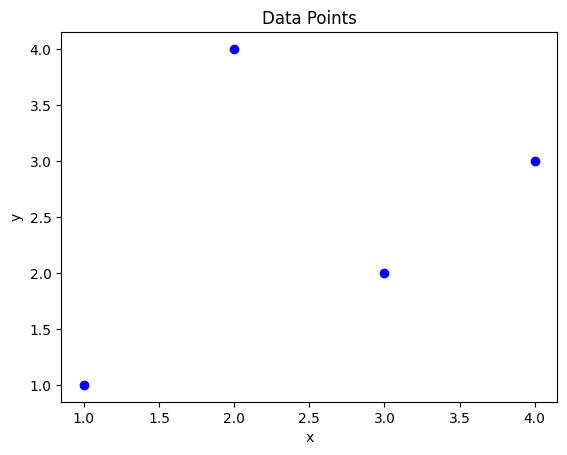

In [29]:
import matplotlib.pyplot as plt
plt.style.use('default')

x = [1,2,3,4]
y = [1,4,2,3]
plt.plot(x,y,'bo') 
plt.title('Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using the different interpolation methods, we could then find some function yhat(x) that would allow us to determine the approximate y value at x = 2.5.

# *17.2 Linear Interpolation*

The most straight-forward interpolation method is linear, simply connecting the points with a straight line. We could then define our interpolation function as:

In [ ]:
# yhat(x) = y_i + ((y_(i+1)-y_i)(x-x_i))/(x_(i+1)-x_i)

Returning to the data points and example from 17.1, let's use linear interpolation to solve the problem statement. Since x = 2.5 lies between 2 and 3, we will take indices i = 2 and i+1 = 3, giving us

In [12]:
4 + ((2 - 4) * (2.5 - 2)) / (3 - 2)

3.0

Graphing our linear interpolation, we have

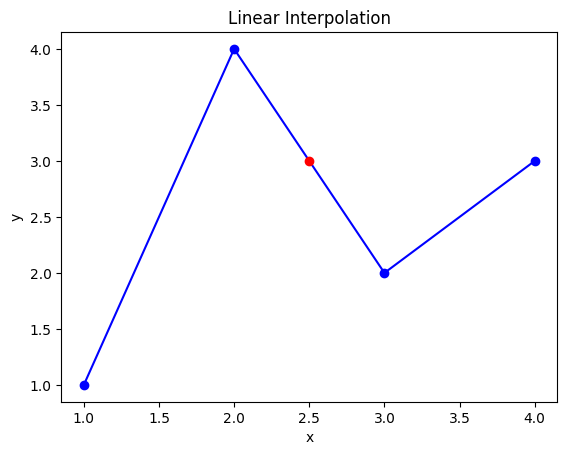

In [27]:
import matplotlib.pyplot as plt
plt.style.use('default')

x = [1,2,3,4]
y = [1,4,2,3]
plt.plot(x,y,'bo-',2.5,3,'ro') 
plt.title('Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Python also has a function for linear interpolation, interp1d(x, y), in scipy. Using this function to solve the problem statement, we could simply say

In [15]:
from scipy.interpolate import interp1d

x = [1,2,3,4]
y = [1,4,2,3]
f = interp1d(x, y)
yhat = f(2.5)
print(yhat)

3.0


# *17.3 Cubic Spline Interpolation*

The next interpolation method is more complex: cubic spline interpolation. In this method, instead of assuming the points are connected by a straight line, we assume they are connected by a piecewise cubic polynomial S_i(x) = a_i(x^3) + b_i(x^2) + c_i(x) + d_i. As such, if we have n points, there will be (n-1) cubic functions connecting the points, in addition to the 4 unknown coefficients per cubic function. In all then, this method involves finding 4(n-1) unknowns.

One of the more obvious issues with linear interpolation is that, although the lines are continuous, they are not smooth. We will account for this in cubic spline interpolation, requiring that the first and second derivatives of neighboring polynomials be equal at the interior data points (i = 2, ..., n-1). We will additionally require the second derivative of the polynomials at the boundaries (i = 1, n) to be 0, although this last condition can be changed depending on the conditions of the problem.

Python thankfully has a function for cubic spline interpolation, CubicSpline(x, y, bc_type), in scipy, where bc_type determines the final condition discussed above. Using this function to solve the problem statement, we would say

In [16]:
from scipy.interpolate import CubicSpline

x = [1,2,3,4]
y = [1,4,2,3]
f = CubicSpline(x,y,bc_type='natural')
yhat = f(2.5)
print(yhat)

3.15


Graphing our cubic spline interpolation, we have

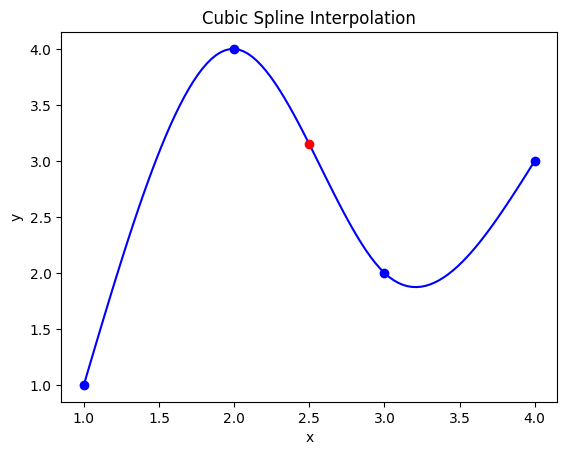

In [28]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [1,4,2,3]
f = CubicSpline(x,y,bc_type='natural')
x_new = np.linspace(1, 4, 100)
y_new = f(x_new)
plt.plot(x_new,y_new,'b',x,y,'bo',2.5,3.15,'ro') 
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Next time, we will consider some further interpolation methods.